In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


# Linear DNA

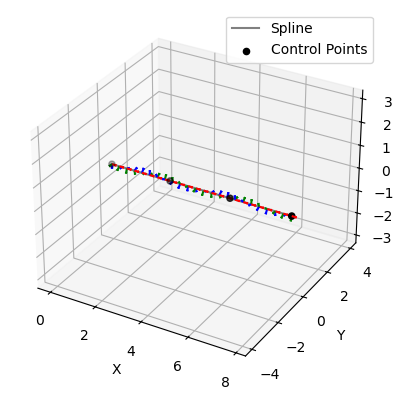

GCCGGTGAACGCCTTCAAACCGGG


<mdtraj.Topology with 2 chains, 48 residues, 984 atoms, 1102 bonds at 0x17afa5650>

In [2]:
n_bp = 24
circular = False
points = mdna.Shapes.line(length=0.34*(n_bp-1),num_points=4)
spline = mdna.SplineFrames(control_points=points,frame_spacing=0.34,bp_per_turn=10.5, twist=True, closed=circular)
spline.plot_frames(equal=True,spline=True,control_points=True)

dna = mdna.StructureGenerator(spline=spline,circular=circular,sequence=None)
pdb = dna.traj
pdb.top

In [3]:
view = nv.show_mdtraj(pdb)
view

NGLWidget()

In [4]:
nuc = mdna.NucleicFrames(pdb)
params, names = nuc.get_parameters()
params.shape

(1, 24, 12)

Text(0.5, -0.05, 'DNA base pair')

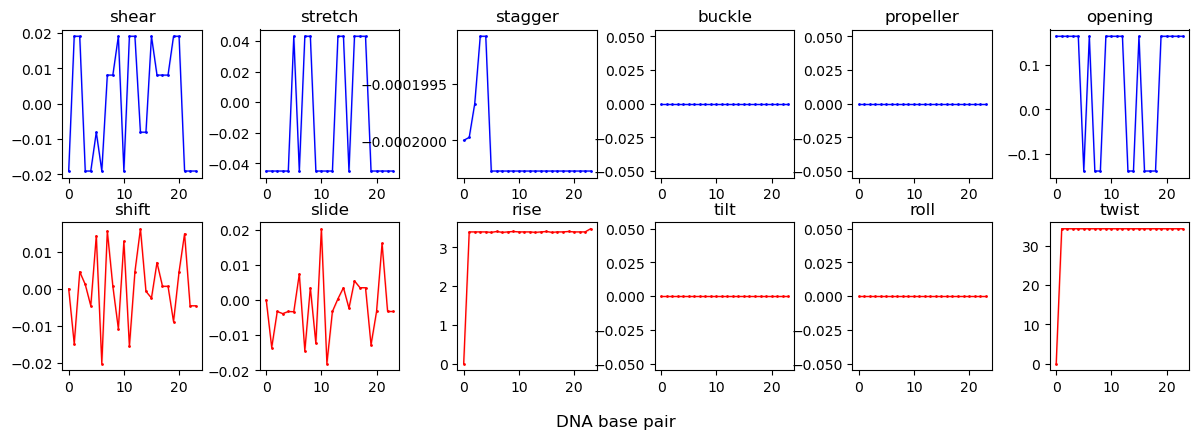

In [5]:
# Confidence intervals 
from scipy.stats import t

fig, ax = plt.subplots(2,6,figsize=(12,4))
fig.tight_layout()
ax = ax.flatten()
M = np.mean(params, axis=0)
S = np.std(params, axis=0)
n = params.shape[1]
ci = t.ppf(0.975, df=n-1) * S / np.sqrt(n)
x = np.arange(0, params.shape[1])
for _, i in enumerate(M.T):
    if _ >= 6:
        c1, c2 = 'red','coral'
    else:
        c1, c2 = 'blue','cornflowerblue'
    ax[_].plot(i, '-o',color=c1,lw=1,markersize=1)
    ax[_].fill_between(x, (i-ci.T[_]), (i+ci.T[_]), color=c2, alpha=0.2)
    ax[_].set_title(names[_])

fig.supxlabel('DNA base pair',y=-0.05)

(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)


(-0.39102787971496555,
 8.211585474014282,
 -4.3012488137930625,
 4.301364539936184,
 -3.22595557719469,
 3.226004438102245)

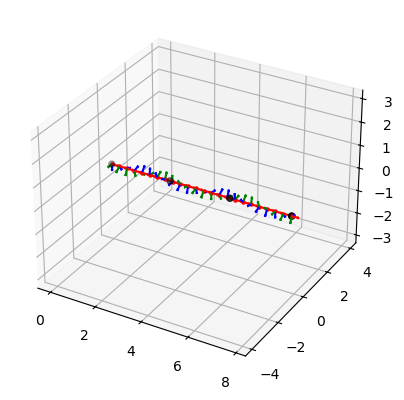

In [6]:
nuc_frames = np.squeeze(nuc.mean_reference_frames)

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for frame in nuc_frames:
    print(frame.shape)    
    ax.scatter(*frame[0], c='r', marker='o',s=5)
    ax.quiver(*frame[0], *frame[1], color='g',length=0.3)
    ax.quiver(*frame[0], *frame[2], color='b',length=0.3)
    ax.quiver(*frame[0], *frame[3], color='r',length=0.3)

ax.scatter(points[:,0],points[:,1],points[:,2], c='k', marker='o',s=20)  
ax.axis('equal')    


In [7]:
spline_frames = spline.frames
for n,s in zip(nuc_frames,spline_frames):
    print(np.round(n-s,2))
    print('---')

[[ 0. -0. -0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
---
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -0.  0.]
 [ 0.  0.  0.]]
---
[[ 0.  0.  0.]
 [ 0. -0.  0.]
 [ 0. -0. -0.]
 [ 0.  0.  0.]]
---
[[ 0. -0.  0.]
 [ 0.  0.  0.]
 [ 0. -0.  0.]
 [ 0.  0.  0.]]
---
[[ 0. -0.  0.]
 [ 0. -0. -0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]]
---
[[-0.  0.  0.]
 [ 0. -0.  0.]
 [ 0. -0. -0.]
 [ 0.  0.  0.]]
---
[[ 0. -0.  0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
---
[[-0.  0.  0.]
 [ 0. -0. -0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]]
---
[[-0.  0.  0.]
 [ 0. -0.  0.]
 [ 0. -0. -0.]
 [ 0.  0.  0.]]
---
[[ 0.  0.  0.]
 [ 0. -0. -0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]]
---
[[ 0. -0. -0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
---
[[ 0.  0.  0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
---
[[ 0.  0.  0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
---
[[-0. -0. -0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
---
[[-0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
---
[[ 0. -0. -0.]
 [ 0. -0. 